## Dataset : Variety-wise Daily Market Prices Data of Commodity
## Source  : data.gov.in

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Onion_2020_2025.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           5821 non-null   object
 1   District        5821 non-null   object
 2   Market          5821 non-null   object
 3   Commodity       5821 non-null   object
 4   Variety         5821 non-null   object
 5   Grade           5821 non-null   object
 6   Arrival_Date    5821 non-null   object
 7   Min_Price       5821 non-null   int64 
 8   Max_Price       5821 non-null   int64 
 9   Modal_Price     5821 non-null   int64 
 10  Commodity_Code  5821 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 500.4+ KB


## Initial Analysis of the Dataset
## Dataset Overview:
* The dataset contains 5,821 rows and 11 columns.
* It records onion market data from 2020 to 2025 across various states, districts, and markets.
* The dataset has no missing values.
* The data types include text (categorical) and numerical values.
## Key Analysis:
* State, District, Market: Identifies the location of the market.
* Commodity, Variety, Grade: Describes the type of onion.
* Arrival_Date: Represents the date of the entry (needs conversion to DateTime).
* Min_Price, Max_Price, Modal_Price: Pricing details in the market.
* Commodity_Code: A unique identifier for the commodity

In [4]:
# Converting Arrival_Date to datetime format
df["Arrival_Date"] = pd.to_datetime(df["Arrival_Date"], errors='coerce', dayfirst=True)
df

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_Price,Max_Price,Modal_Price,Commodity_Code
0,Telangana,Hyderabad,Bowenpally,Onion,1st Sort,FAQ,2024-07-03,1000,3500,3100,23
1,Telangana,Hyderabad,Bowenpally,Onion,1st Sort,FAQ,2024-07-08,800,3000,2500,23
2,Telangana,Hyderabad,Bowenpally,Onion,1st Sort,FAQ,2024-07-15,1000,3000,2500,23
3,Telangana,Hyderabad,Erragadda(Rythu Bazar),Onion,1st Sort,FAQ,2024-07-01,3900,3900,3900,23
4,Telangana,Hyderabad,Erragadda(Rythu Bazar),Onion,1st Sort,FAQ,2024-07-04,3500,3500,3500,23
...,...,...,...,...,...,...,...,...,...,...,...
5816,Telangana,Hyderabad,Mahboob Manison,Onion,2nd Sort,Non-FAQ,2025-02-12,400,1900,1500,23
5817,Telangana,Hyderabad,Mahboob Manison,Onion,2nd Sort,Non-FAQ,2025-02-15,300,1900,1500,23
5818,Telangana,Hyderabad,Mahboob Manison,Onion,2nd Sort,Non-FAQ,2025-02-19,300,2300,1800,23
5819,Telangana,Hyderabad,Mahboob Manison,Onion,2nd Sort,Non-FAQ,2025-02-21,300,2500,1800,23


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   State           5821 non-null   object        
 1   District        5821 non-null   object        
 2   Market          5821 non-null   object        
 3   Commodity       5821 non-null   object        
 4   Variety         5821 non-null   object        
 5   Grade           5821 non-null   object        
 6   Arrival_Date    5821 non-null   datetime64[ns]
 7   Min_Price       5821 non-null   int64         
 8   Max_Price       5821 non-null   int64         
 9   Modal_Price     5821 non-null   int64         
 10  Commodity_Code  5821 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 500.4+ KB


In [6]:
# Generating descriptive statistics
price_stats = df[['Min_Price', 'Max_Price', 'Modal_Price']].describe()
print("Price Statistics:\n", price_stats)

Price Statistics:
          Min_Price    Max_Price  Modal_Price
count  5821.000000  5821.000000  5821.000000
mean   1135.569318  2307.894520  1764.091565
std     837.950075  1118.667737   883.448306
min     100.000000   500.000000   300.000000
25%     600.000000  1500.000000  1100.000000
50%     900.000000  2000.000000  1600.000000
75%    1500.000000  3000.000000  2250.000000
max    6000.000000  8300.000000  6500.000000


In [7]:
# Checking for any missing dates
missing_dates = df["Arrival_Date"].isnull().sum()
print("\nMissing Dates:", missing_dates)


Missing Dates: 0


In [8]:
df.isnull().sum()

State             0
District          0
Market            0
Commodity         0
Variety           0
Grade             0
Arrival_Date      0
Min_Price         0
Max_Price         0
Modal_Price       0
Commodity_Code    0
dtype: int64

In [9]:
# Aggregating modal price by date
df_trend = df.groupby("Arrival_Date")["Modal_Price"].mean()
df_trend

Arrival_Date
2020-03-06    1800.000000
2020-03-07    1800.000000
2020-03-08    1800.000000
2020-03-10    1600.000000
2020-03-11    1633.333333
                 ...     
2025-02-26    2350.000000
2025-02-28    2283.333333
2025-03-01    2216.666667
2025-03-02    2250.000000
2025-03-03    2000.000000
Name: Modal_Price, Length: 1735, dtype: float64

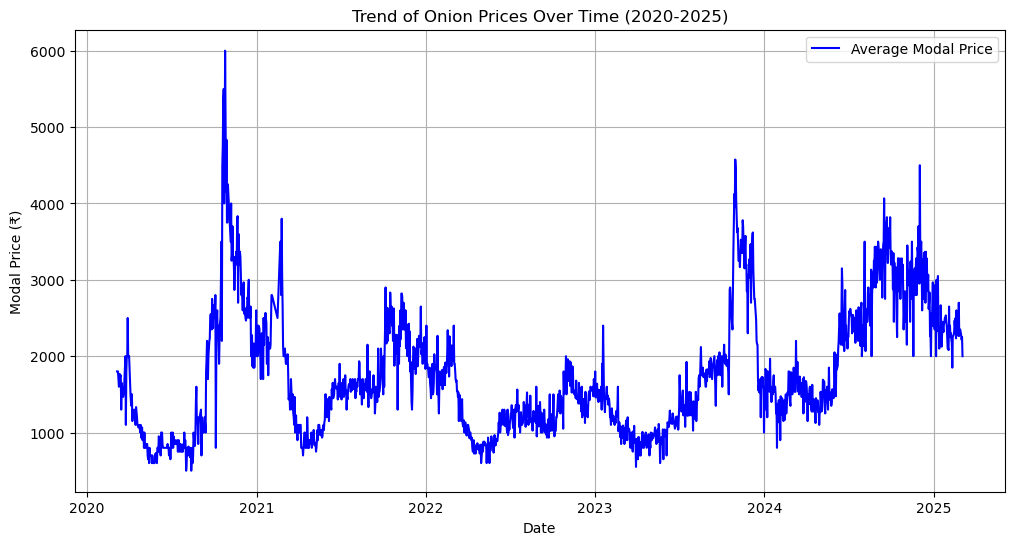

In [9]:
# Onions price trend in the period 2020-2025
plt.figure(figsize=(12, 6))
plt.plot(df_trend.index, df_trend.values, label="Average Modal Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Modal Price (₹)")
plt.title("Trend of Onion Prices Over Time (2020-2025)")
plt.legend()
plt.grid(True)
plt.show()

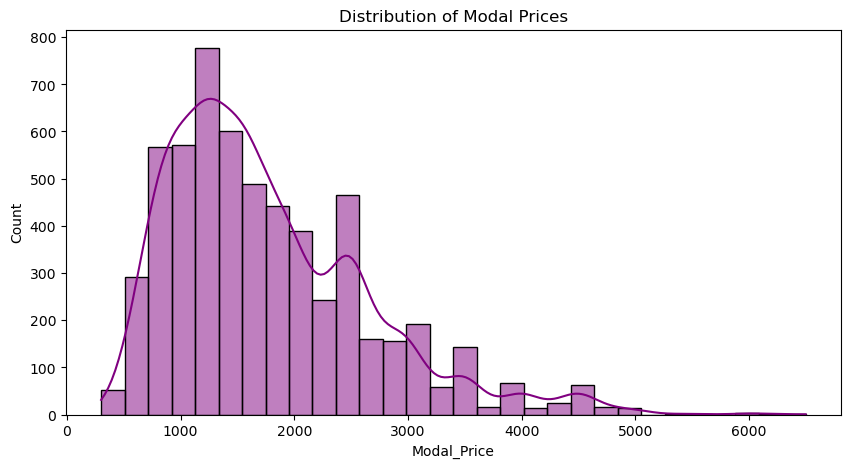

In [10]:
# 1. Distribution of Modal Prices
plt.figure(figsize=(10, 5))
sns.histplot(df["Modal_Price"], bins=30, kde=True, color='purple')
plt.title("Distribution of Modal Prices")
plt.show()


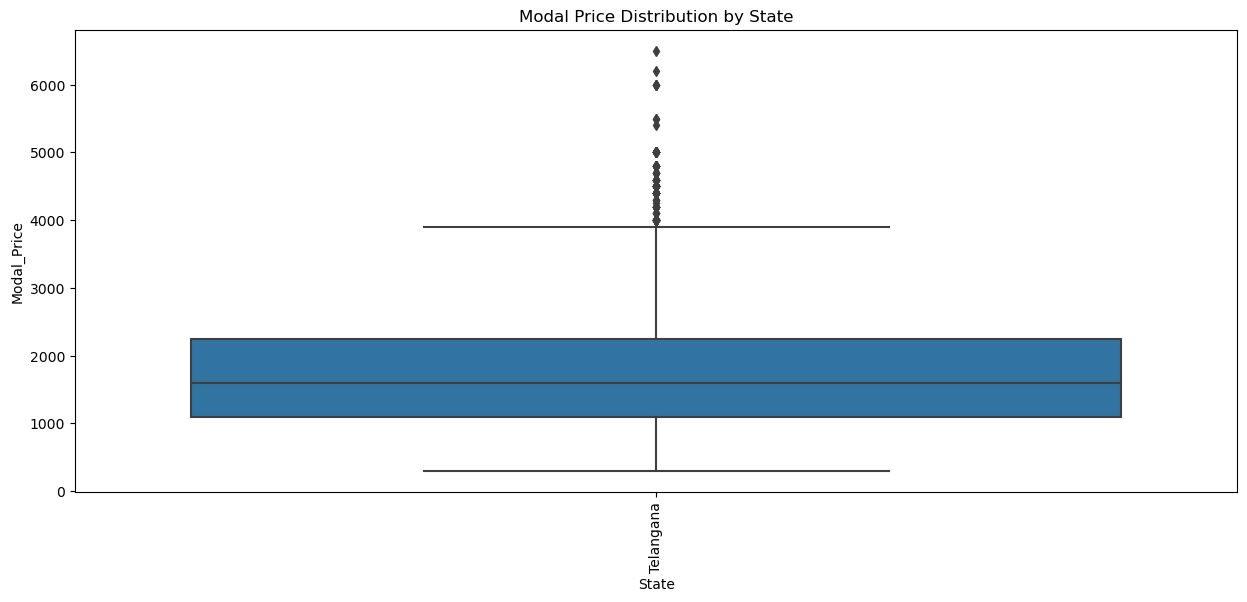

In [11]:
# 2. Boxplot of Modal Prices by State
plt.figure(figsize=(15, 6))
sns.boxplot(x='State', y='Modal_Price', data=df)
plt.xticks(rotation=90)
plt.title("Modal Price Distribution by State")
plt.show()


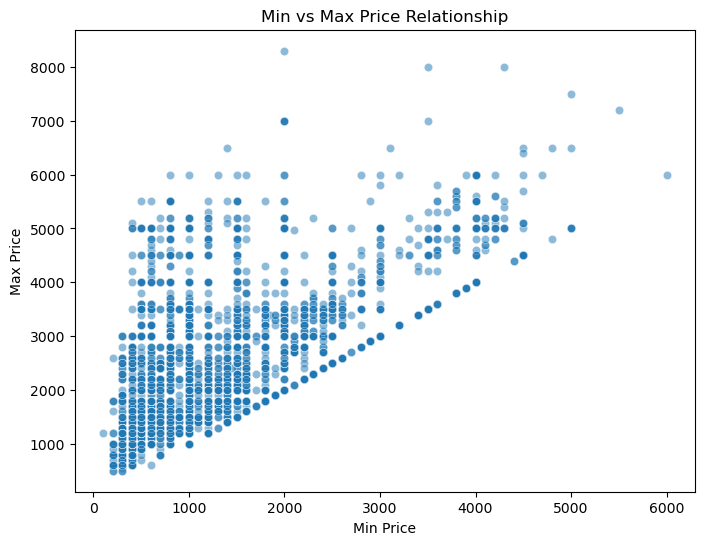

In [12]:
# 3. Scatter Plot of Min vs Max Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Min_Price'], y=df['Max_Price'], alpha=0.5)
plt.xlabel("Min Price")
plt.ylabel("Max Price")
plt.title("Min vs Max Price Relationship")
plt.show()

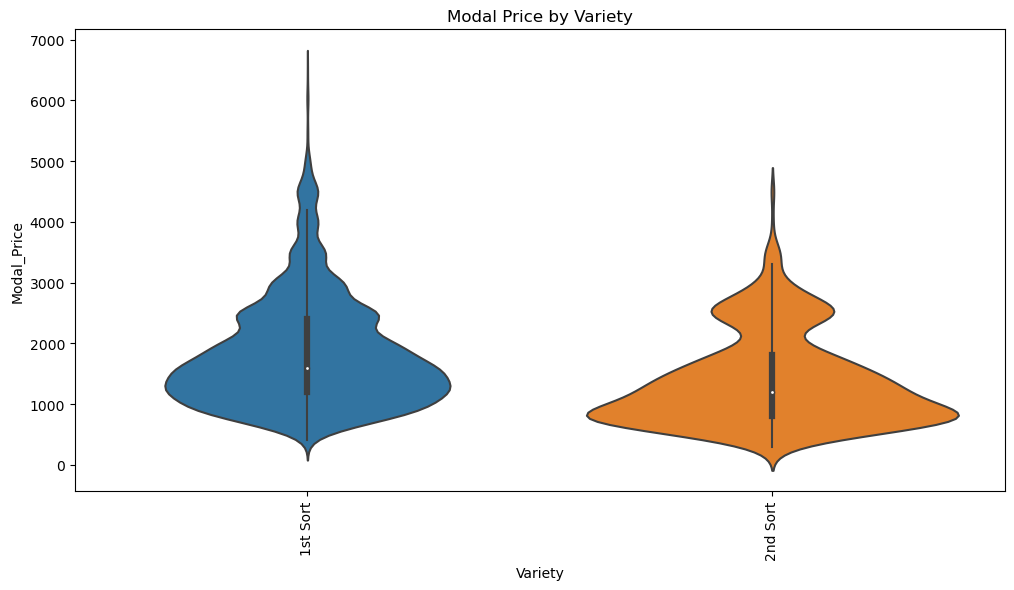

In [13]:
# 4. Violin Plot of Modal Prices by Variety
plt.figure(figsize=(12, 6))
sns.violinplot(x='Variety', y='Modal_Price', data=df)
plt.xticks(rotation=90)
plt.title("Modal Price by Variety")
plt.show()

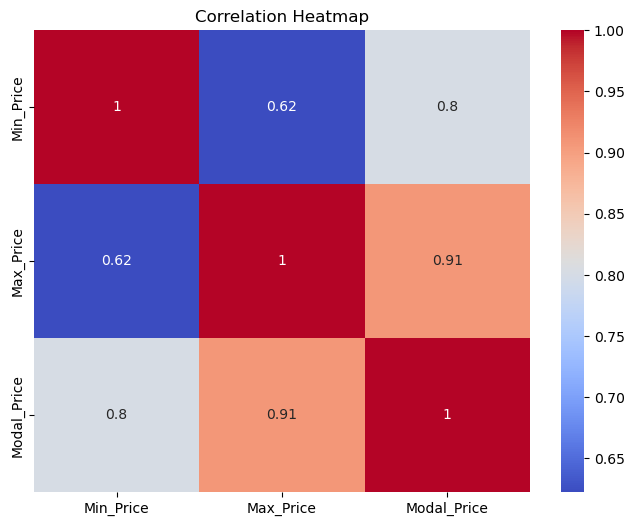

In [14]:
# 5. Heatmap of Price Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Min_Price', 'Max_Price', 'Modal_Price']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

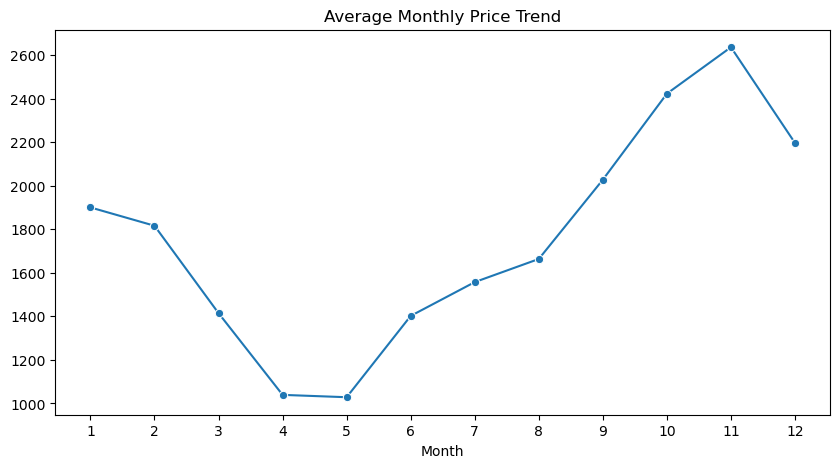

In [15]:
# 6. Monthly Price Trend
df['Month'] = df['Arrival_Date'].dt.month
df_monthly = df.groupby('Month')["Modal_Price"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_monthly.index, y=df_monthly.values, marker='o')
plt.xticks(range(1, 13))
plt.title("Average Monthly Price Trend")
plt.show()

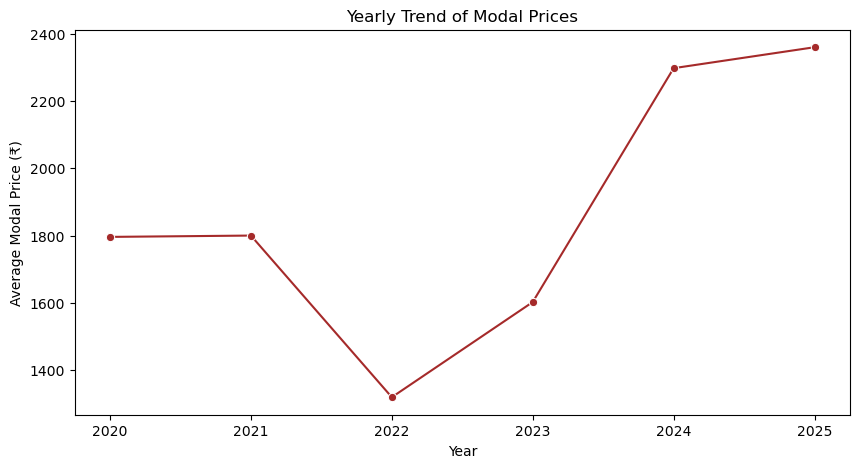

In [30]:
# 7. Line Chart of Average Price by Year
df_yearly = df.groupby(df['Arrival_Date'].dt.year)["Modal_Price"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_yearly.index, y=df_yearly.values, marker='o', color='brown')
plt.xlabel("Year")
plt.ylabel("Average Modal Price (₹)")
plt.title("Yearly Trend of Modal Prices")
plt.show()

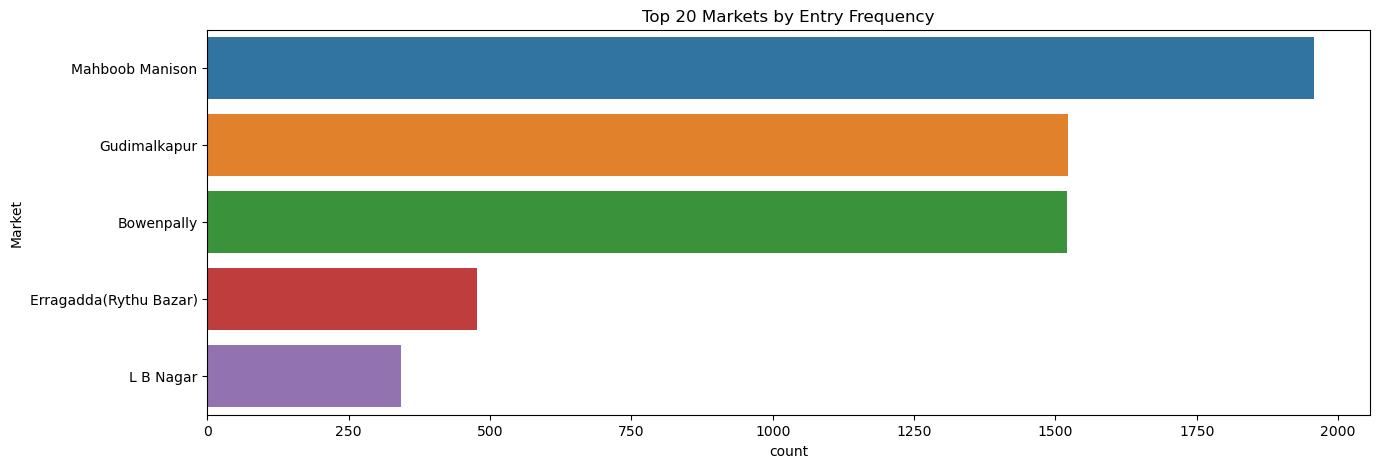

In [19]:
# 8. Countplot of Market Frequency
plt.figure(figsize=(15, 5))
sns.countplot(y='Market', data=df, order=df['Market'].value_counts().index[:20])
plt.title("Top 20 Markets by Entry Frequency")
plt.show()

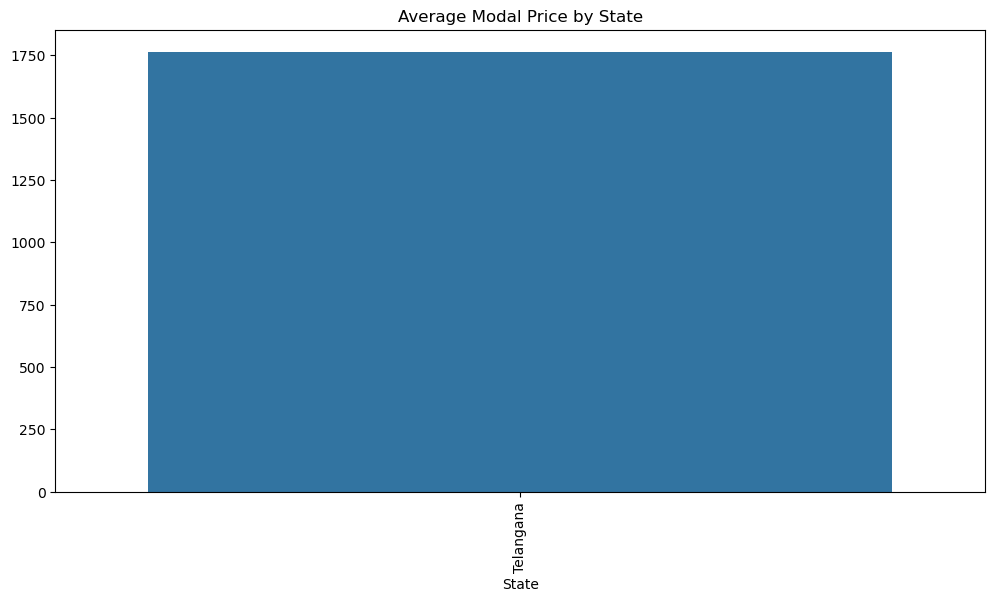

In [16]:
# 9. Bar Chart of Average Prices by State
df_statewise = df.groupby('State')["Modal_Price"].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=df_statewise.index, y=df_statewise.values)
plt.xticks(rotation=90)
plt.title("Average Modal Price by State")
plt.show()


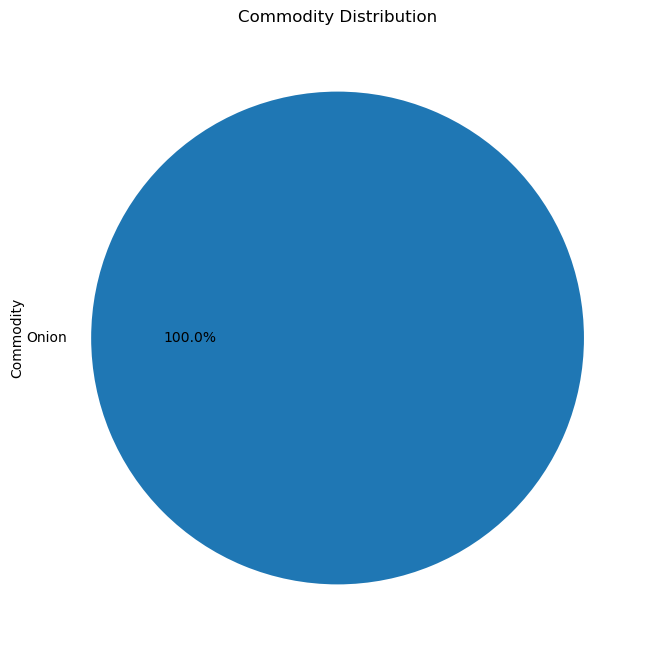

In [17]:
# 10. Pie Chart of Commodity Distribution
plt.figure(figsize=(8, 8))
df['Commodity'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Commodity Distribution")
plt.show()


C:\Users\khsbh\AppData\Local\Temp\ipykernel_25348\584061853.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Modal_Price'], shade=True, color='red')


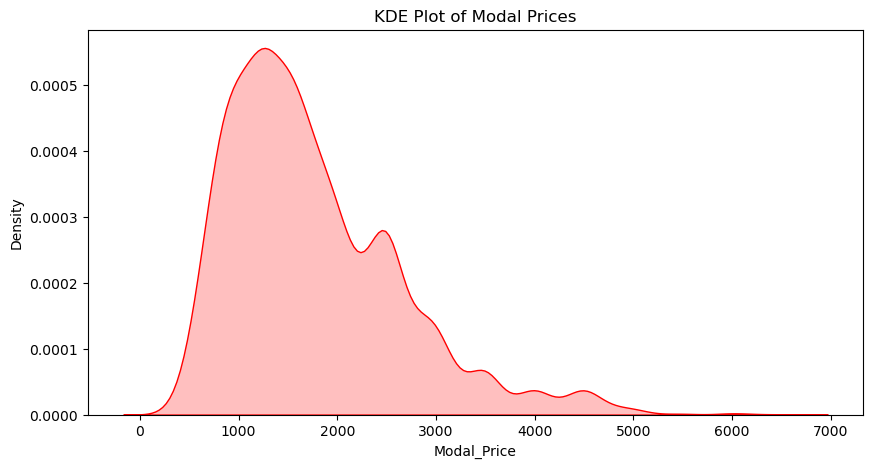

In [20]:
# 11. KDE Plot of Modal Prices
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Modal_Price'], shade=True, color='red')
plt.title("KDE Plot of Modal Prices")
plt.show()


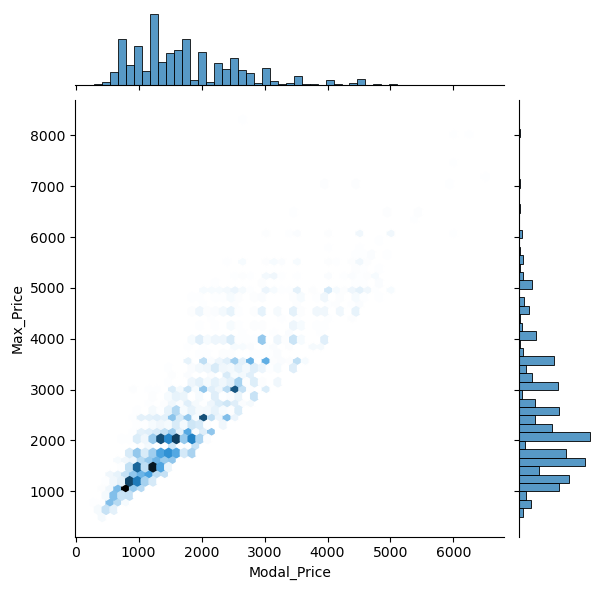

In [21]:
# 12. Joint Plot of Modal Price and Max Price
sns.jointplot(x='Modal_Price', y='Max_Price', data=df, kind='hex', gridsize=50)
plt.show()

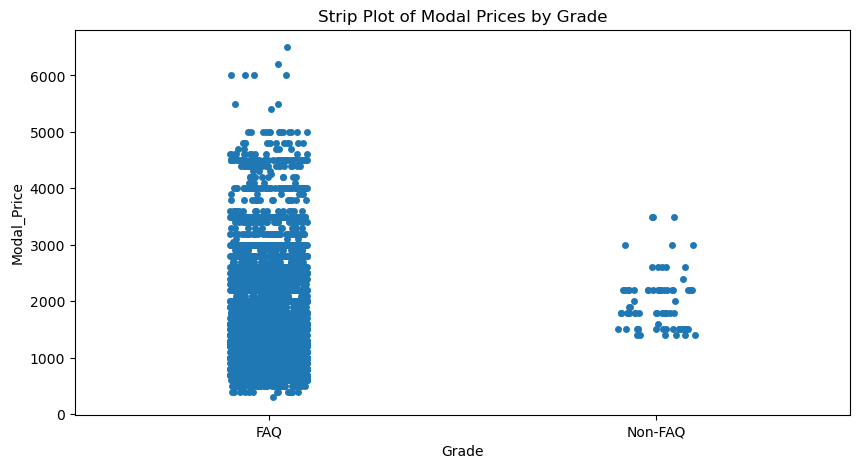

In [22]:
# 13. Strip Plot of Prices by Grade
plt.figure(figsize=(10, 5))
sns.stripplot(x='Grade', y='Modal_Price', data=df, jitter=True)
plt.title("Strip Plot of Modal Prices by Grade")
plt.show()


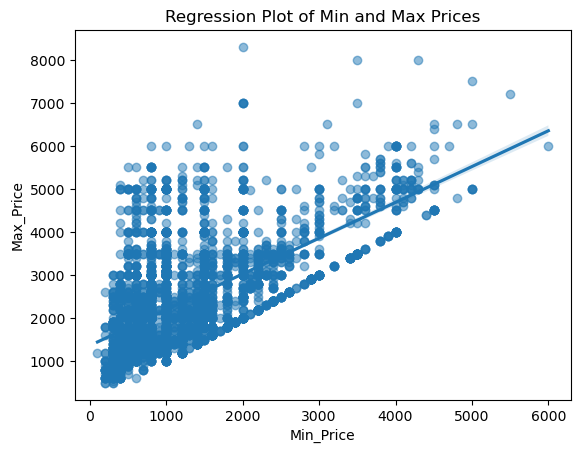

In [23]:
# 14. Regression Plot of Min and Max Price
sns.regplot(x='Min_Price', y='Max_Price', data=df, scatter_kws={'alpha':0.5})
plt.title("Regression Plot of Min and Max Prices")
plt.show()


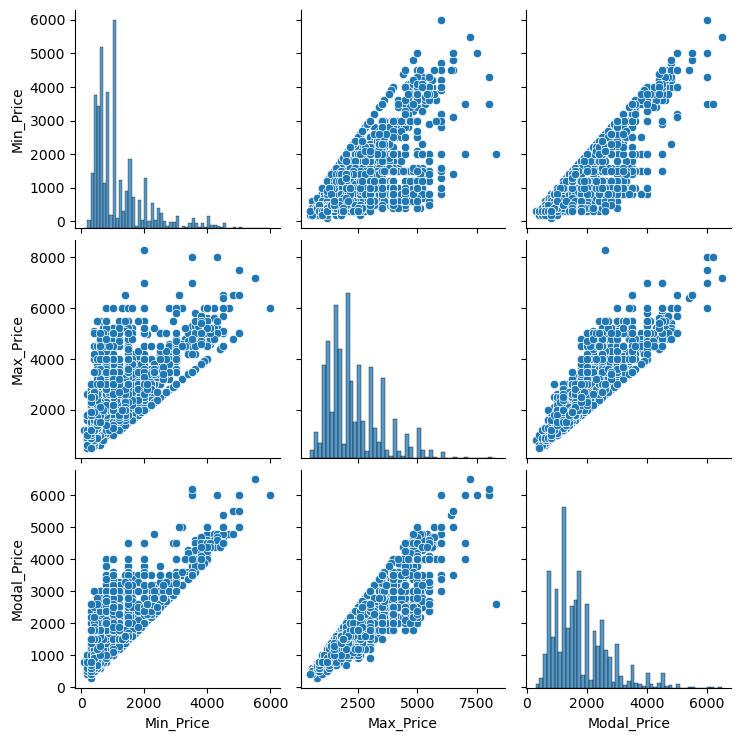

In [24]:
# 15. Pairplot of Price Columns
sns.pairplot(df[['Min_Price', 'Max_Price', 'Modal_Price']])
plt.show()

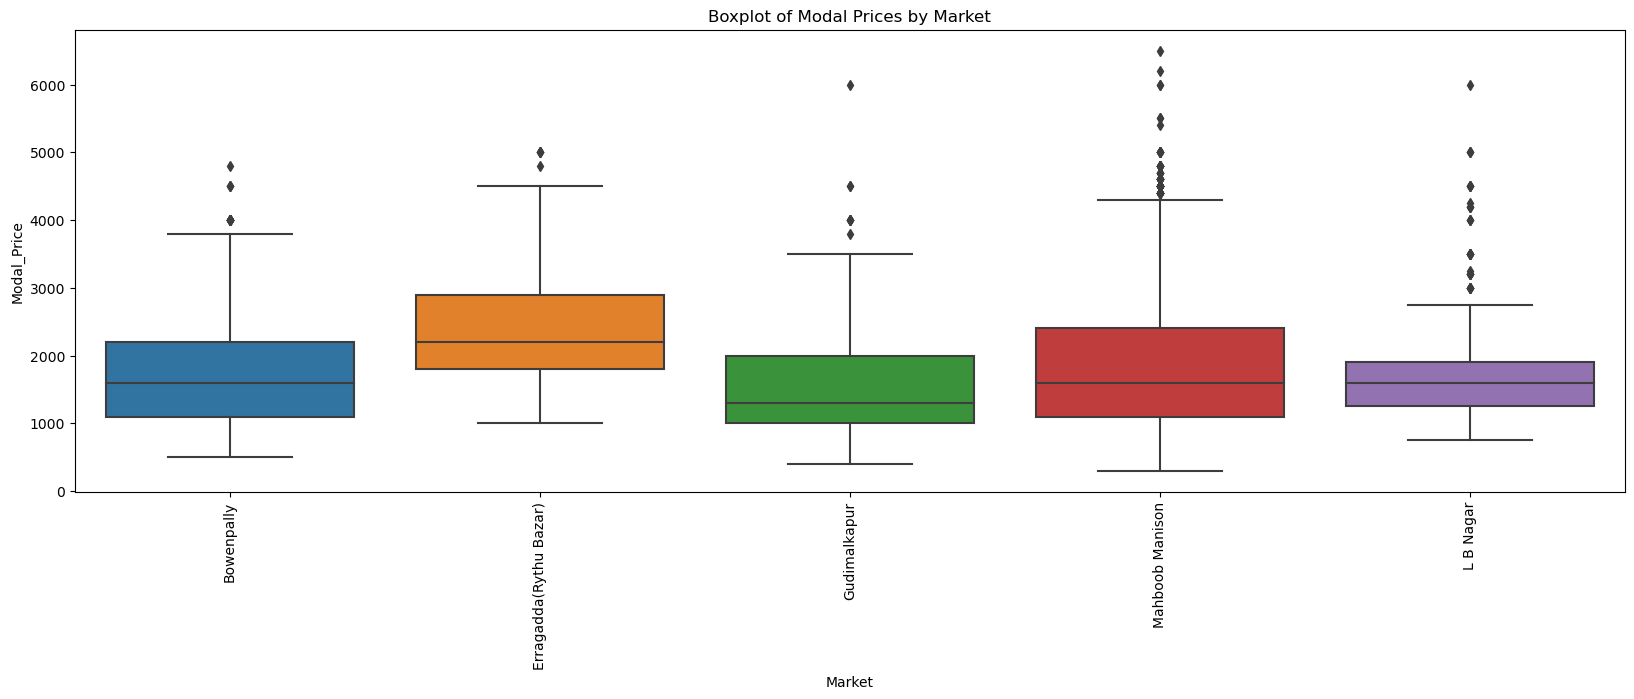

In [25]:
# 16. Boxplot of Prices by Market
plt.figure(figsize=(20, 6))
sns.boxplot(x='Market', y='Modal_Price', data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Modal Prices by Market")
plt.show()


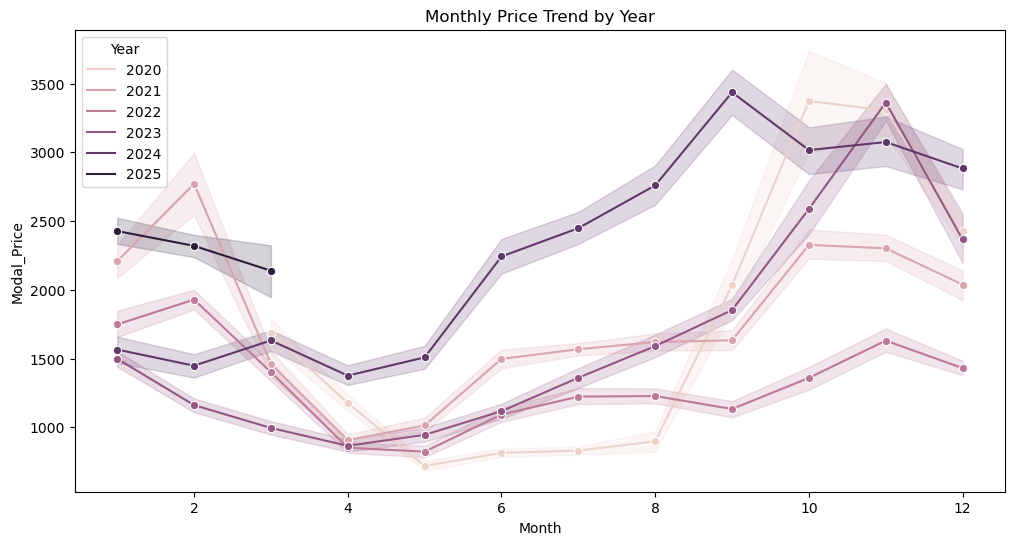

In [26]:
# 17. Monthly Price Trend by Year
df['Year'] = df['Arrival_Date'].dt.year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='Modal_Price', hue='Year', marker='o')
plt.title("Monthly Price Trend by Year")
plt.show()

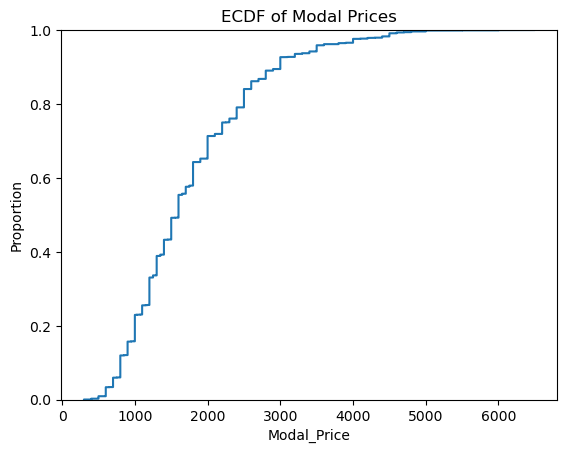

In [27]:
# 18. ECDF Plot of Modal Prices
sns.ecdfplot(df['Modal_Price'])
plt.title("ECDF of Modal Prices")
plt.show()


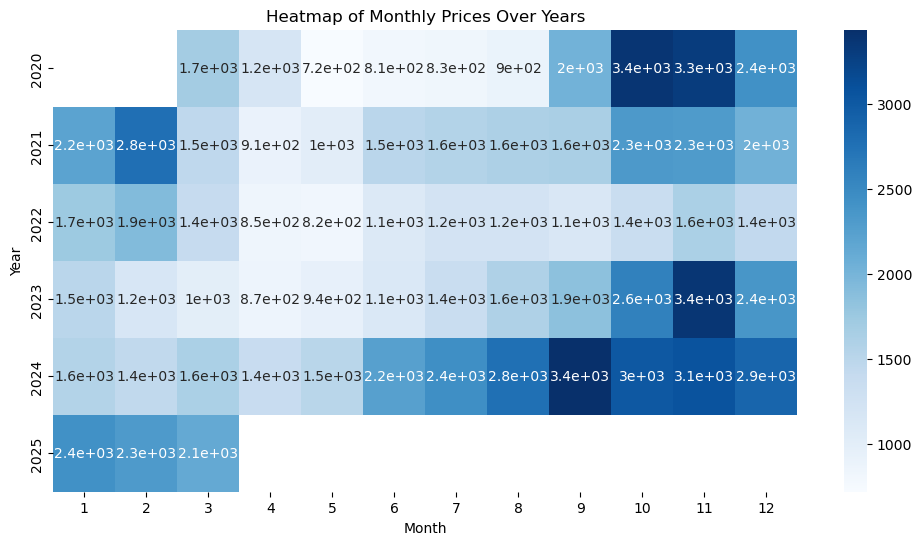

In [28]:
# 19. Heatmap of Monthly Prices
pivot_table = df.pivot_table(values='Modal_Price', index='Year', columns='Month', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='Blues', annot=True)
plt.title("Heatmap of Monthly Prices Over Years")
plt.show()

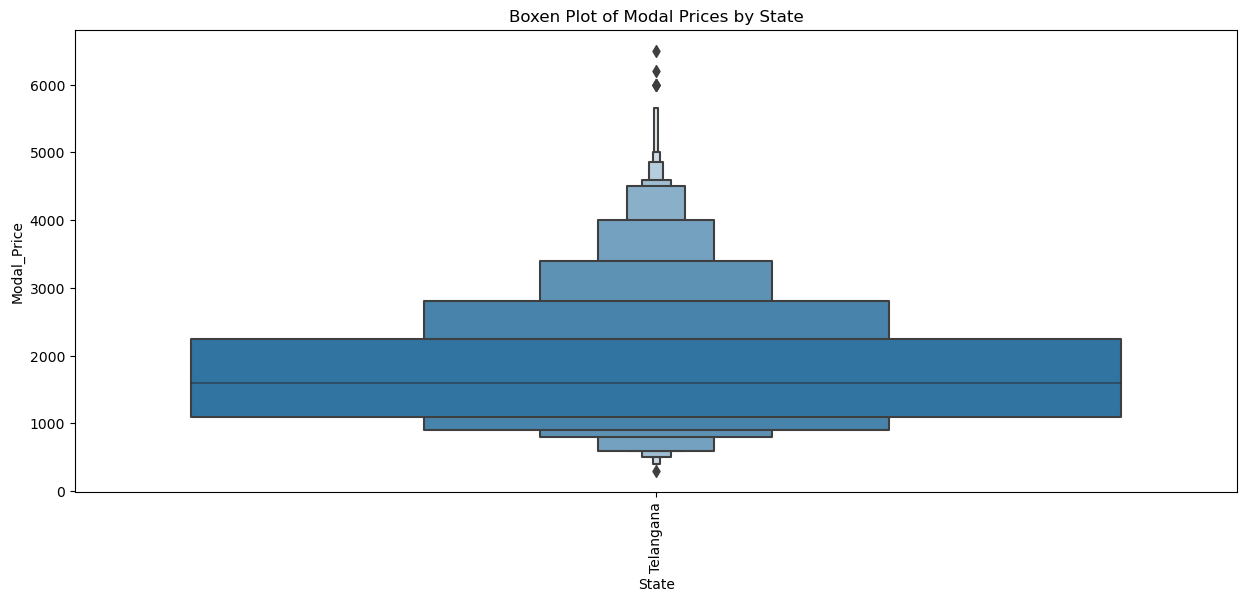

In [29]:
# 20. Boxen Plot of Prices by State
plt.figure(figsize=(15, 6))
sns.boxenplot(x='State', y='Modal_Price', data=df)
plt.xticks(rotation=90)
plt.title("Boxen Plot of Modal Prices by State")
plt.show()

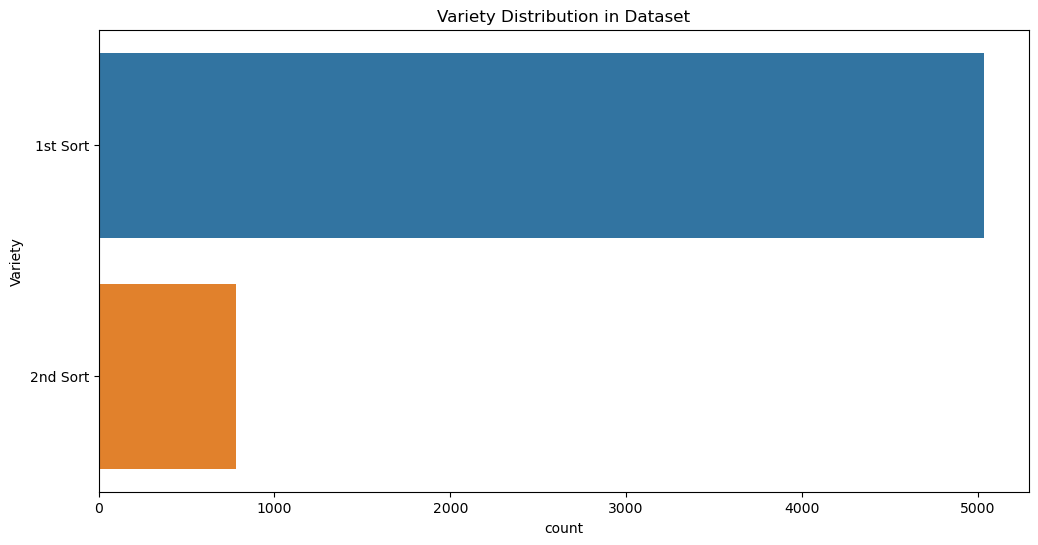

In [33]:
# 21. Countplot of Variety Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Variety', data=df, order=df['Variety'].value_counts().index)
plt.title("Variety Distribution in Dataset")
plt.show()

### Dataset Observations:

1. **Date Range & Missing Data:**
   - The dataset covers onion prices from 2020 to 2025.
   - Some missing values exist in the Arrival_Date column.

2. **Price Trends & Statistics:**
   - The minimum, maximum, and modal prices of onions show fluctuations over time.
   - The average modal price varies yearly , indicating possible seasonal or market-driven trends.

3. **Variety Analysis:**
   - Multiple onion varieties are recorded in the dataset.
   - Some varieties are more frequently listed, as seen in the Variety Countplot.
   - The price distribution varies by variety, with some having a wider range of prices.

4. **Distribution Insights:**
   - The histogram of minimum prices suggests that most onion prices fall within a certain range.
   - The violin and boxplots indicate price spread and outliers among different varieties.

5. **Trend Over Time:**
   - The line chart of average price per year shows a possible rising or fluctuating trend.
   - Peak or dip years might be correlated with supply-chain issues, demand surges, or external factors.

